# **CIS 520: Machine Learning**

## **SVD**


- **Content Creator:** Hanwen Zhang, Siyun Hu
- **Content Reviewers:** Xiayan Ji
- **Reference:**
 https://github.com/ageron/handson-ml/blob/master/math_linear_algebra.ipynb 
 https://www.analyticsvidhya.com/blog/2019/08/5-applications-singular-value-decomposition-svd-data-science/
 https://towardsdatascience.com/singular-value-decomposition-example-in-python-dab2507d85a0
- **Objectives:** The worksheet aims to 
  - Help you understand the concept of SVD, thin SVD and pseudoinverse
  - Understand how we reduce dimensionality using SVD 
  - Compare different SVD methods implemented in Python


 Before you start to complete this worksheet, I strongly encourge you to review linear algebra. Here is the [Linear Algebra Review Worksheet](https://drive.google.com/file/d/1yLcLM_7zMYnSf99G51gdlFYWc3RyOgVj/view?usp=sharing) .

Imports

In [1]:
# import packages
import numpy.linalg as LA
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon

## **Autograding and the PennGrader**


Enter your PennID (numbers not letters!) in the specified section.

In [2]:
%%capture
!pip install penngrader


In [3]:
import random 
import numpy as np
import pandas as pd
import os
import sys
import matplotlib.pyplot as plt
from numpy.linalg import *

import dill
import base64

In [4]:
# For autograder only, do not modify this cell. 
# True for Google Colab, False for autograder
NOTEBOOK = (os.getenv('IS_AUTOGRADER') is None)
if NOTEBOOK:
    print("[INFO, OK] Google Colab.")
else:
    print("[INFO, OK] Autograder.")
    sys.exit()

[INFO, OK] Google Colab.


### Insert PennID here!

In [5]:
#PLEASE ENSURE YOUR PENN-ID IS ENTERED CORRECTLY. IF NOT, THE AUTOGRADER WON'T KNOW WHO 
#TO ASSIGN POINTS TO YOU IN OUR BACKEND
STUDENT_ID = 57931095 # YOUR PENN-ID GOES HERE AS AN INTEGER#

In [6]:
import penngrader.grader

grader = penngrader.grader.PennGrader(homework_id = 'CIS_5200_202230_HW_SVD_WS', student_id = STUDENT_ID)

PennGrader initialized with Student ID: 57931095

Make sure this correct or we will not be able to store your grade


In [7]:
# A helper function for grading utils
def grader_serialize(obj):        # A helper function
    '''Dill serializes Python object into a UTF-8 string'''
    byte_serialized = dill.dumps(obj, recurse = True)
    return base64.b64encode(byte_serialized).decode("utf-8")

## **Singular Value Decomposition**
It turns out that any $m \times n$ matrix $M$ can be decomposed into the dot product of three simple matrices:
* a rotation matrix $U$ (an $m \times m$ orthogonal matrix)
* a scaling & projecting matrix $\Sigma$ (an $m \times n$ diagonal matrix)
* and another rotation matrix $V^T$ (an $n \times n$ orthogonal matrix)

$M = U \cdot \Sigma \cdot V^{T}$

It is very convenient to do SVD by using `NumPy`. For example, let's decompose the following matrix.

In [8]:
matrix = np.array([
        [1, 1.5],
        [0, 1]
    ])
U, S_diag, V_T = LA.svd(matrix) 
U

array([[ 0.89442719, -0.4472136 ],
       [ 0.4472136 ,  0.89442719]])

In [9]:
S_diag

array([2. , 0.5])

Note that this is just a 1D array containing the diagonal values of Σ. To get the actual matrix Σ, we can use NumPy's `diag` function:

In [10]:
S = np.diag(S_diag)
S

array([[2. , 0. ],
       [0. , 0.5]])

Now let's check that $U \cdot \Sigma \cdot V^T$ is indeed equal to the original `matrix`:

In [11]:
U.dot(np.diag(S_diag)).dot(V_T)

array([[ 1.00000000e+00,  1.50000000e+00],
       [-1.25949234e-17,  1.00000000e+00]])

In [12]:
matrix

array([[1. , 1.5],
       [0. , 1. ]])

## *Question 1*

What will happen if `matrix` is symmetric? 

In [13]:
sym_matrix = np.array([
        [1, 1.5, 2],
        [1.5, 1, 3],
        [2, 3, 1]
    ])

In [14]:
U, S_diag, V_T = LA.svd(sym_matrix) 

In [15]:
U

array([[-0.49170703, -0.16951636, -0.85410093],
       [-0.59888042, -0.64620718,  0.47303121],
       [-0.63211268,  0.7440971 ,  0.21622458]])

In [16]:
V_T

array([[-0.49170703, -0.59888042, -0.63211268],
       [ 0.16951636,  0.64620718, -0.7440971 ],
       [ 0.85410093, -0.47303121, -0.21622458]])

What are the first elements (i.e. the first entry of the first row vector) of U and V, respectively?

In [19]:
# What are first element of U and V, respectively?
U_0_0 = -0.49170703
V_0_0 = -0.49170703

In [20]:
grader.grade(test_case_id = 'U_V_symmetric', answer = (U_0_0, V_0_0))

Correct! You earned 2.0/2.0 points. You are a star!

Your submission has been successfully recorded in the gradebook.


### Geometric understanding of SVD

Geometrically, we can regard Singular Value Decomposition as two rotations and one rescaling operation. Let's apply these transformations one by one (in reverse order) on the unit square to understand what's going on. First, let's apply the first rotation $V^T$:

In [21]:
def plot_transformation(P_before, P_after, text_before, text_after, axis = [0, 5, 0, 4], arrows=False):
    if arrows:
        for vector_before, vector_after in zip(P_before.T, P_after.T):
            plot_vector2d(vector_before, color="blue", linestyle="--")
            plot_vector2d(vector_after, color="red", linestyle="-")
    plt.gca().add_artist(Polygon(P_before.T, alpha=0.2))
    plt.gca().add_artist(Polygon(P_after.T, alpha=0.3, color="r"))
    plt.text(P_before[0].mean(), P_before[1].mean(), text_before, fontsize=18, color="blue")
    plt.text(P_after[0].mean(), P_after[1].mean(), text_after, fontsize=18, color="red")
    plt.axis(axis)
    plt.grid()


In [22]:
Square = np.array([
        [0, 0, 1, 1],
        [0, 1, 1, 0]
    ])

# U, S, V_T is decomposition of shear transformation
U, S_diag, V_T  = LA.svd(matrix)
S = np.diag(S_diag)

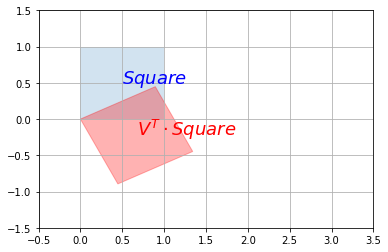

In [23]:
plot_transformation(Square, V_T.dot(Square), "$Square$", "$V^T \cdot Square$",
                    axis=[-0.5, 3.5 , -1.5, 1.5])
plt.show()

Now let's rescale along the vertical and horizontal axes using  Σ :

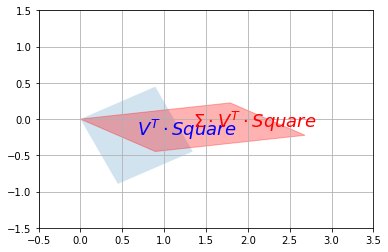

In [24]:
plot_transformation(V_T.dot(Square), S.dot(V_T).dot(Square), "$V^T \cdot Square$", "$\Sigma \cdot V^T \cdot Square$",
                    axis=[-0.5, 3.5 , -1.5, 1.5])
plt.show()

Finally, we apply the second rotation $U$:

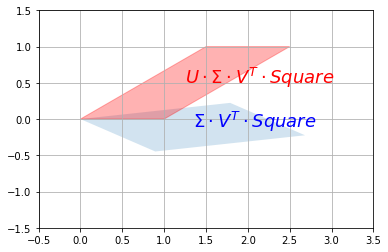

In [25]:
plot_transformation(S.dot(V_T).dot(Square), U.dot(S).dot(V_T).dot(Square),"$\Sigma \cdot V^T \cdot Square$", "$U \cdot \Sigma \cdot V^T \cdot Square$",
                    axis=[-0.5, 3.5 , -1.5, 1.5])
plt.show()

And we can see that the result is indeed a shear mapping of the original unit square.

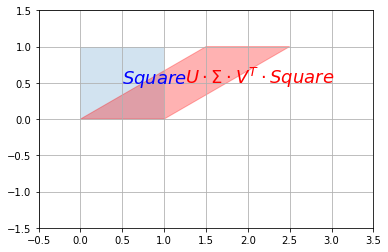

In [26]:
plot_transformation(Square, U.dot(S).dot(V_T).dot(Square),"$Square$", "$U \cdot \Sigma \cdot V^T \cdot Square$",
                    axis=[-0.5, 3.5 , -1.5, 1.5])
plt.show()

## **The Moore Penrose Pseudoinverse**

The following can be used to find the pseudoinverse according to the lecture:
$$
\boldsymbol{A}^{+}=\boldsymbol{V} \boldsymbol{D}^{+} \boldsymbol{U}^{T}
$$
with **U**, **D** and **V** respectively the left singular vectors, the singular values and the right singular vectors of **A**.

We will see an example of this.

First, create a non square matrix **A**, calculate its singular value decomposition and its pseudoinverse.

In [27]:
A = np.array([[7, 2], [3, 4], [5, 3]])
U, D, V = np.linalg.svd(A)


D_plus = np.zeros((A.shape[0], A.shape[1])).T
D_plus[:D.shape[0], :D.shape[0]] = np.linalg.inv(np.diag(D))

A_plus = V.T.dot(D_plus).dot(U.T)
A_plus

array([[ 0.16666667, -0.10606061,  0.03030303],
       [-0.16666667,  0.28787879,  0.06060606]])

We can now check with the pinv() function from Numpy that the pseudoinverse is correct:

In [28]:
np.linalg.pinv(A)

array([[ 0.16666667, -0.10606061,  0.03030303],
       [-0.16666667,  0.28787879,  0.06060606]])

It looks good! We can now check that it is really the near inverse of **A**. Since we know that
$$
\boldsymbol{A}^{-1} \boldsymbol{A}=\boldsymbol{I}_{\boldsymbol{n}}
$$
with 
$$
\boldsymbol{I}_{2}=\left[\begin{array}{ll}
1 & 0 \\
0 & 1
\end{array}\right]
$$
(Notice that here n=2)

In [29]:
A_plus.dot(A)

array([[1.00000000e+00, 2.70616862e-16],
       [2.28983499e-16, 1.00000000e+00]])

This is not bad! This is almost the identity matrix!
A difference with the real inverse is that 
$$
\boldsymbol{A}^{+} \boldsymbol{A} \approx \boldsymbol{I} \text { but } \boldsymbol{A A}^{+} \neq \boldsymbol{I}
$$
Another way of computing the pseudoinverse is to use this formula:
$$
\left(A^{T} A\right)^{-1} A^{T}
$$
The result is less acurate than the SVD method and Numpy *pinv()* uses the SVD ( [cf Numpy doc](https://numpy.org/doc/stable/reference/generated/numpy.linalg.pinv.html)). Here is an example from the same matrix **A**.

In [30]:
A_plus_1 = np.linalg.inv(A.T.dot(A)).dot(A.T)
A_plus_1

array([[ 0.16666667, -0.10606061,  0.03030303],
       [-0.16666667,  0.28787879,  0.06060606]])

In this case the result is the same as with the SVD way.

## *Question 2*

Observe the output of next cell, what relationship do you find between the eigenvalues and singular values? Prove your findings.


In [31]:
A = np.array([[7, 2], [3, 4], [5, 3]])
U, D, V = np.linalg.svd(A)
evs, evmat = np.linalg.eig(A.T @ A)
print('singular values:', D)
print('eigenvalues:',evs)
print('squared singular values:',D**2)

singular values: [10.25142677  2.62835484]
eigenvalues: [105.09175083   6.90824917]
squared singular values: [105.09175083   6.90824917]


What relationship do you find between the eigenvalues and singular values? Type your result below.

In [32]:
# What relationship do you find between the eigenvalues and singular values?
ans = 'equal'  #{type:"string"}


In [33]:
grader.grade(test_case_id = 'eigenval_and_singularval', answer = ans)

Correct! You earned 2.0/2.0 points. You are a star!

Your submission has been successfully recorded in the gradebook.


## **Applications of Singular Value Decomposition (SVD)**

You just need to know four things to understand the applications:

1.SVD is the decomposition of a matrix A into 3 matrices – **U, S, and V**

2.**S** is the diagonal matrix of singular values. Think of **singular values** as the importance values of different features in the matrix

3.The **rank** of a matrix is a measure of the unique information stored in a matrix. Higher the rank, more the information

4.**Eigenvectors** of a matrix are directions of maximum spread or variance of data

In most of the applications, the basic principle of [Dimensionality Reduction](https://en.wikipedia.org/wiki/Dimensionality_reduction) is used. You want to reduce a high-rank matrix to a low-rank matrix while preserving important information.

 In the following part, we will discuss several of these applications of SVD. 

### ''Thin'' SVD
We’ll attempt to classify handwritten digits. Fortunately, the *scikit-learn* library provides a wrapper function for importing the dataset into our program.

In [34]:
import numpy as np
from sklearn.datasets import load_digits
from matplotlib import pyplot as plt
from sklearn.decomposition import TruncatedSVD
float_formatter = lambda x: "%.2f" % x
np.set_printoptions(formatter={'float_kind':float_formatter})
from sklearn.ensemble import RandomForestClassifier

The dataset contains 1797 8x8 images. If you specify *return_X_y=True* the function will return the pixels as a one dimensional array.

In [35]:
X, y = load_digits(return_X_y=True)
print(X.shape)
print(y)

(1797, 64)
[0 1 2 ... 8 9 8]


To better understand this dataset, we visualize the 16th image:

[0.00 0.00 0.00 8.00 15.00 1.00 0.00 0.00 0.00 0.00 0.00 12.00 14.00 0.00
 0.00 0.00 0.00 0.00 3.00 16.00 7.00 0.00 0.00 0.00 0.00 0.00 6.00 16.00
 2.00 0.00 0.00 0.00 0.00 0.00 7.00 16.00 16.00 13.00 5.00 0.00 0.00 0.00
 15.00 16.00 9.00 9.00 14.00 0.00 0.00 0.00 3.00 14.00 9.00 2.00 16.00
 2.00 0.00 0.00 0.00 7.00 15.00 16.00 11.00 0.00]


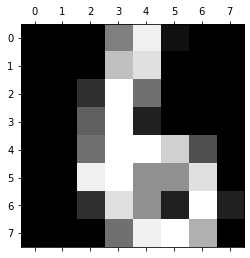

In [36]:
image = X[16]
print(image)
image = image.reshape((8, 8))
plt.matshow(image, cmap = 'gray')

Now, each sample contains 64 values. It is quite space-consuming. Therefore, we are wondering whether we could use Singular Value Decomposition to achieve dimension reduction.

We want to reconstruct the image using only 2 features. Please notice that the **s** matrix returned by the function must be converted into a diagonal matrix using the *diag* method. By default, *diag* will create a matrix that is n by n, relative to the original matrix. This causes a problem as the size of the matrices no longer follow the rule of matrix multiplication where the number of columns in a matrix must match the number of rows in the other matrix. Therefore, we create a new m x n matrix and populate the first n x n part of it with the diagonal matrix.

[[0.00 -0.00 3.65 10.74 7.36 2.46 3.14 0.16]
 [0.00 -0.00 4.34 13.68 8.09 1.14 2.16 0.16]
 [0.00 0.00 4.49 15.21 7.57 -0.93 0.36 0.13]
 [0.00 0.00 4.05 14.27 6.42 -1.95 -0.65 0.10]
 [0.00 -0.00 6.41 16.42 14.81 9.29 9.92 0.37]
 [0.00 -0.00 6.31 15.79 14.85 9.87 10.40 0.37]
 [0.00 -0.00 4.99 12.65 11.63 7.49 7.95 0.29]
 [0.00 -0.00 4.20 6.69 12.78 14.26 13.73 0.38]]


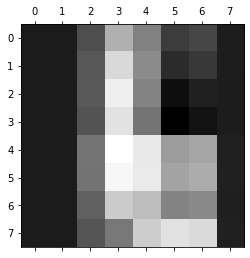

In [37]:
U, s, V_T = np.linalg.svd(image)
S = np.zeros((image.shape[0], image.shape[1]))
S[:image.shape[0], :image.shape[0]] = np.diag(s)
n_component = 2
S = S[:, :n_component]
V_T = V_T[:n_component, :]
AA = U.dot(S.dot(V_T))
print(AA)
plt.matshow(AA, cmap = 'gray')

The reconstructed image using only two features seem blur. Therefore, instead, we can use 20/64 features.

[[0.00 0.00 -0.00 8.00 15.00 1.00 0.00 0.00]
 [0.00 -0.00 0.00 12.00 14.00 0.00 0.00 0.00]
 [0.00 0.00 3.00 16.00 7.00 0.00 0.00 0.00]
 [0.00 0.00 6.00 16.00 2.00 0.00 0.00 0.00]
 [0.00 -0.00 7.00 16.00 16.00 13.00 5.00 0.00]
 [0.00 -0.00 15.00 16.00 9.00 9.00 14.00 0.00]
 [0.00 -0.00 3.00 14.00 9.00 2.00 16.00 2.00]
 [0.00 -0.00 0.00 7.00 15.00 16.00 11.00 0.00]]


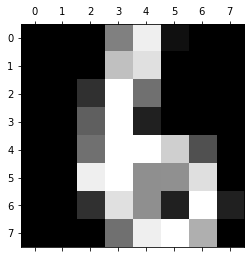

In [38]:
U, s, V_T = np.linalg.svd(image)
S = np.zeros((image.shape[0], image.shape[1]))
S[:image.shape[0], :image.shape[0]] = np.diag(s)
n_component = 20
S = S[:, :n_component]
V_T = V_T[:n_component, :]
AA = U.dot(S.dot(V_T))
print(AA)
plt.matshow(AA, cmap = 'gray')

### Truncated SVD in scikit-learn

In most common applications, it's quite time-consuming to find the complete matrices U, S and V.And we know that in **dimensionality reduction** cases, we are ultimately going to trim our matrices, so why do find the complete matrices in the first place? 

In such cases, it is better to use **TruncatedSVD** from **sklearn decomposition.** You specify the number of features you want in the output as the **n_components** parameter. **n_components** should be **strictly less** than the number of features in the input matrix:

In [39]:
import numpy as np
from sklearn.decomposition import TruncatedSVD

In [40]:
%%time
A = np.array([[-1, 2, 0, 3], [2, 0, -2, 2], [0, -2, 1, 1]])
print("Original Matrix:")
print(A)

svd =  TruncatedSVD(n_components = 2)
A_transf = svd.fit_transform(A)
V=svd.components_

print("Singular values:")
print(svd.singular_values_)

print("Transformed Matrix after reducing to 2 features:")
print(A_transf @ V)

Original Matrix:
[[-1  2  0  3]
 [ 2  0 -2  2]
 [ 0 -2  1  1]]
Singular values:
[4.14 3.00]
Transformed Matrix after reducing to 2 features:
[[-0.93 2.28 -0.21 2.78]
 [1.95 -0.18 -1.86 2.14]
 [0.39 -0.43 -0.18 -0.25]]
CPU times: user 12.9 ms, sys: 9.34 ms, total: 22.2 ms
Wall time: 17.6 ms


Compared with ''Thin'' SVD:

In [41]:
%%time
A = np.array([[-1, 2, 0, 3], [2, 0, -2, 2], [0, -2, 1, 1]])
print("Original Matrix:")
print(A)

U, s, V_T = np.linalg.svd(A)
S = np.zeros((A.shape[0], A.shape[1]))
S[:A.shape[0], :A.shape[0]] = np.diag(s)
n_component = 2
S = S[:, :n_component]
print("Singular values:")
print(S)
V_T = V_T[:n_component, :]
AA = U.dot(S.dot(V_T))
print("Transformed Matrix after reducing to 2 features:")
print(AA)


Original Matrix:
[[-1  2  0  3]
 [ 2  0 -2  2]
 [ 0 -2  1  1]]
Singular values:
[[4.14 0.00]
 [0.00 3.00]
 [0.00 0.00]]
Transformed Matrix after reducing to 2 features:
[[-0.93 2.28 -0.21 2.78]
 [1.95 -0.18 -1.86 2.14]
 [0.39 -0.43 -0.18 -0.25]]
CPU times: user 3.48 ms, sys: 0 ns, total: 3.48 ms
Wall time: 3.31 ms


### Randomized SVD in scikit-learn
Randomized SVD gives the same results as Truncated SVD and has a **faster** computation time. While Truncated SVD uses an exact solver ARPACK, Randomized SVD uses approximation techniques.

In [42]:
import numpy as np
from sklearn.utils.extmath import randomized_svd

In [43]:
%time

A = np.array([[-1, 2, 0, 3], [2, 0, -2, 2], [0, -2, 1, 1]])
u, s, vt = randomized_svd(A, n_components = 2)

print("Left Singular Vectors:")
print(u)

print("Singular Values:") 
print(np.diag(s))

print("Right Singular Vectors:") 
print(vt)

print("Transformed Matrix after reducing to 2 features:")
print(u @ np.diag(s) @ vt)

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 7.63 µs
Left Singular Vectors:
[[0.79 -0.59]
 [0.61 0.78]
 [-0.07 0.20]]
Singular Values:
[[4.14 0.00]
 [0.00 3.00]]
Right Singular Vectors:
[[0.10 0.42 -0.31 0.85]
 [0.72 -0.52 -0.46 0.00]]
Transformed Matrix after reducing to 2 features:
[[-0.93 2.28 -0.21 2.78]
 [1.95 -0.18 -1.86 2.14]
 [0.39 -0.43 -0.18 -0.25]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:376: FutureWarning: If 'random_state' is not supplied, the current default is to use 0 as a fixed seed. This will change to  None in version 1.2 leading to non-deterministic results that better reflect nature of the randomized_svd solver. If you want to silence this warning, set 'random_state' to an integer seed or to None explicitly depending if you want your code to be deterministic or not.
  FutureWarning,


## *Question 3*

<!-- Compare the result of truncated SVD, thin SVD and randomized SVD, what do you find? Is this the same with your expectation? And what if you replace `A` with a bigger matrix? -->

Compare the result of truncated SVD, thin SVD and randomized SVD, what do you find? Is this the same with your expectation? And what if you replace A with a bigger matrix? Type your response below.

In [44]:
# Compare the result of truncated SVD, thin SVD and randomized SVD, what do you find? Is this the same with your expectation? And what if you replace A with a bigger matrix?
ans3 = 'randomised_SVD was the fastest by nearly 100 times. If A is made larger, we will eventually see truncated SVD performing better than thin SVD' #{type:"string"}

In [45]:
grader.grade(test_case_id = 'SVD_compare', answer = ans3)

Correct! You earned 1.0/1.0 points. You are a star!

Your submission has been successfully recorded in the gradebook.


## **Case study: Image Compression**

How many times have we faced this issue? We love clicking images with our smartphone cameras and saving random photos off the web. And then one day – no space! Image compression helps deal with that headache.

It minimizes the size of an image in bytes to an acceptable level of quality. This means that you are able to store more images in the same disk space as compared to before.

Image compression takes advantage of the fact that only a few of the singular values obtained after SVD are large. You can trim the three matrices based on the first few singular values and obtain a compressed approximation of the original image. Some of the compressed images are nearly indistinguishable from the original by the human eye.

In [46]:
!wget https://cdn.pixabay.com/photo/2017/03/27/16/50/beach-2179624_960_720.jpg

--2022-10-29 20:55:54--  https://cdn.pixabay.com/photo/2017/03/27/16/50/beach-2179624_960_720.jpg
Resolving cdn.pixabay.com (cdn.pixabay.com)... 104.18.10.234, 104.18.11.234, 2606:4700::6812:aea, ...
Connecting to cdn.pixabay.com (cdn.pixabay.com)|104.18.10.234|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 214028 (209K) [binary/octet-stream]
Saving to: ‘beach-2179624_960_720.jpg’

beach-2179624_960_7 100%[===================>] 209.01K  --.-KB/s    in 0.02s   

2022-10-29 20:55:54 (9.03 MB/s) - ‘beach-2179624_960_720.jpg’ saved [214028/214028]



(638, 638) (638,) (960, 960)


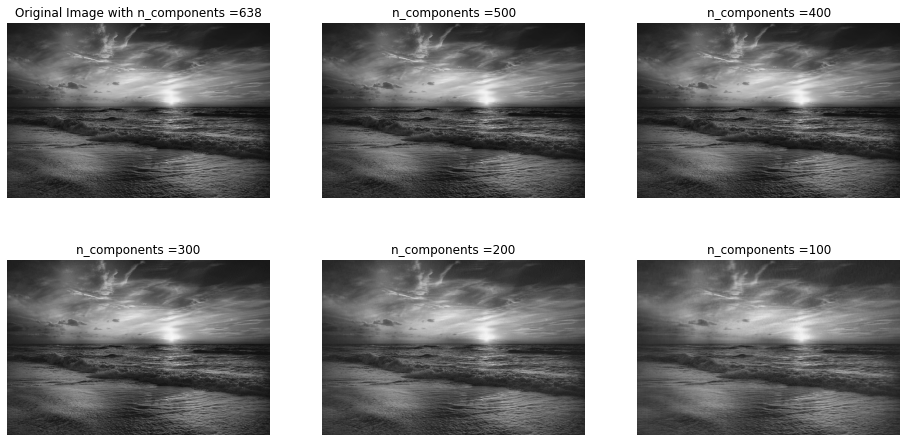

In [47]:
# get the image from "https://cdn.pixabay.com/photo/2017/03/27/16/50/beach-2179624_960_720.jpg"
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2

# read image in grayscale
img = cv2.imread('beach-2179624_960_720.jpg', 0)

# obtain svd
U, S, V = np.linalg.svd(img)

# inspect shapes of the matrices
print(U.shape, S.shape, V.shape)

# plot images with different number of components
comps = [638, 500, 400, 300, 200, 100]

plt.figure(figsize = (16, 8))
for i in range(6):
  low_rank = U[:, :comps[i]] @ np.diag(S[:comps[i]]) @ V[:comps[i], :]
  if(i  == 0):
     plt.subplot(2, 3, i+1), plt.imshow(low_rank, cmap = 'gray'), plt.axis('off'), plt.title("Original Image with n_components =" + str(comps[i]))
  else:
     plt.subplot(2, 3, i+1), plt.imshow(low_rank, cmap = 'gray'), plt.axis('off'), plt.title("n_components =" + str(comps[i]))

### Submission

Please make sure to download your finished worksheet as .ipynb and again as .py, and submit both SVD_WS.ipynb and SVD_WS.py to Gradescope.